# NBA Player Shot Charts

In [104]:
import pandas as pd
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.static import players

In [105]:
# Search for the player by name
player_name = "Jalen Brunson"
player_info = players.find_players_by_full_name(player_name)
player_info  # This will display the player's info

[{'id': 1628973,
  'full_name': 'Jalen Brunson',
  'first_name': 'Jalen',
  'last_name': 'Brunson',
  'is_active': True}]

In [106]:
# Extract player ID
player_id = player_info[0]['id']
player_id

1628973

In [107]:
# Fetch shot data for the 2023-24 NBA season
shot_data = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=player_id,
    season_nullable='2023-24',
    season_type_all_star='Regular Season',
    context_measure_simple='FGA'
)

# Convert the shot data into a DataFrame
shot_df = shot_data.get_data_frames()[0]
shot_df.head()  # Show the first few rows

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022300002,7,1628973,Jalen Brunson,1610612752,New York Knicks,1,11,40,...,Right Side Center(RC),16-24 ft.,18,92,162,1,1,20231103,MIL,NYK
1,Shot Chart Detail,0022300002,16,1628973,Jalen Brunson,1610612752,New York Knicks,1,10,39,...,Right Side(R),8-16 ft.,14,143,32,1,0,20231103,MIL,NYK
2,Shot Chart Detail,0022300002,22,1628973,Jalen Brunson,1610612752,New York Knicks,1,9,50,...,Left Side(L),8-16 ft.,14,-96,112,1,0,20231103,MIL,NYK
3,Shot Chart Detail,0022300002,39,1628973,Jalen Brunson,1610612752,New York Knicks,1,7,52,...,Left Side Center(LC),16-24 ft.,21,-165,131,1,1,20231103,MIL,NYK
4,Shot Chart Detail,0022300002,54,1628973,Jalen Brunson,1610612752,New York Knicks,1,6,42,...,Left Side Center(LC),24+ ft.,27,-104,254,1,0,20231103,MIL,NYK


In [108]:
# Check if the column exists
#print(shot_df.columns)

# Inspect the unique values in the 'SHOT_MADE_FLAG' column
if 'SHOT_MADE_FLAG' in shot_df.columns:
    print(shot_df['SHOT_MADE_FLAG'].unique())
else:
    print("SHOT_MADE_FLAG column is not found.")


[1 0]


In [109]:
# Check columns in the DataFrame
print(shot_df.columns)

print(shot_df['SHOT_MADE_FLAG'].value_counts())
print(shot_df['SHOT_TYPE'].value_counts())

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')
SHOT_MADE_FLAG
0    858
1    790
Name: count, dtype: int64
SHOT_TYPE
2PT Field Goal    1122
3PT Field Goal     526
Name: count, dtype: int64


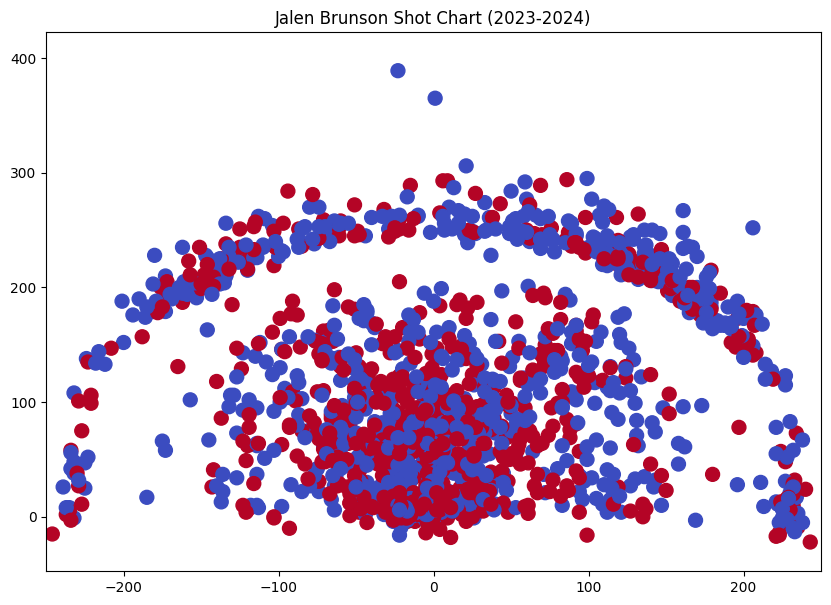

In [110]:
import matplotlib.pyplot as plt

# Create a scatter plot for the shot locations
plt.figure(figsize=(10, 7))
plt.scatter(shot_df['LOC_X'], shot_df['LOC_Y'], c=shot_df['SHOT_MADE_FLAG'], cmap='coolwarm', s=100)
plt.xlim(-250, 250)  # NBA court width is approximately 500 units (from -250 to 250)
plt.ylim(-47.5, 422.5)  # NBA court length is approximately 470 units (half-court view)
plt.title(f"{player_name} Shot Chart (2023-2024)")
plt.show()

In [111]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_colored_court(ax=None, lw=2):
    """
    Draw a half-court basketball court with improved visuals and colors.
    """
    if ax is None:
        ax = plt.gca()

    # Court elements colors
    court_color = "#4d4d4d"  # Dark gray for court lines
    hoop_color = "#d62728"  # Red for hoop
    paint_color = "#1f77b4"  # Blue for the paint (key area)
    
    # Hoop
    hoop = plt.Circle((0, 0), radius=7.5, linewidth=lw, color=hoop_color, fill=False)

    # Backboard
    backboard = plt.Rectangle((-30, -7.5), 60, 1, linewidth=lw, color=court_color)

    # Paint area (key)
    paint = plt.Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=court_color, fill=False)

    # Free-throw circle
    free_throw_top = plt.Circle((0, 142.5), radius=60, linewidth=lw, color=court_color, fill=False)
    free_throw_bottom = plt.Circle((0, 142.5), radius=60, linewidth=lw, color=court_color, fill=False, linestyle='dashed')

    # Restricted area arc
    restricted_area = plt.Circle((0, 0), radius=40, linewidth=lw, color=court_color, fill=False)

    # Three-point line (arc and straight lines)
    three_point_arc = patches.Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=court_color)  # Arc
    three_point_side1 = plt.Line2D([-220, -220], [-47.5, 92.5], linewidth=lw, color=court_color)  # Left corner
    three_point_side2 = plt.Line2D([220, 220], [-47.5, 92.5], linewidth=lw, color=court_color)  # Right corner

    # Adding the elements to the axes
    ax.add_patch(hoop)
    ax.add_patch(backboard)
    ax.add_patch(paint)
    ax.add_patch(free_throw_top)
    ax.add_patch(free_throw_bottom)
    ax.add_patch(restricted_area)
    ax.add_patch(three_point_arc)
    ax.add_line(three_point_side1)
    ax.add_line(three_point_side2)

    # Set court boundaries and remove axes
    ax.set_xlim(-250, 250)
    ax.set_ylim(-47.5, 422.5)
    ax.set_aspect(1)
    ax.axis('off')

    return ax


/var/folders/w6/f0qyl4rd7v789m3kymvy95vc0000gn/T/ipykernel_57125/3641708616.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], c='#d62728', marker='x', s=100, edgecolors='black', label='Missed Shots', zorder=2)


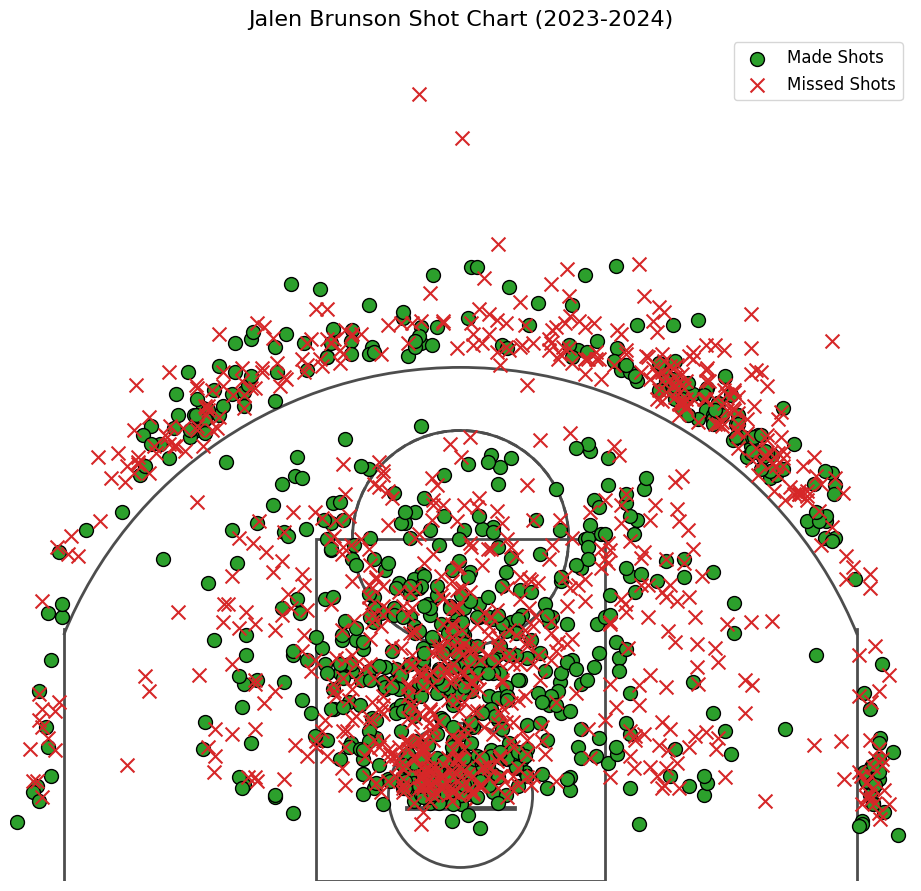

In [112]:
# Filter for made shots (SHOT_MADE_FLAG == 1)
made_shots = shot_df[shot_df['SHOT_MADE_FLAG'] == 1]

# Filter for missed shots (SHOT_ATTEMPTED_FLAG == 1 but SHOT_MADE_FLAG is missing or not 1)
missed_shots = shot_df[(shot_df['SHOT_ATTEMPTED_FLAG'] == 1) & (~shot_df['SHOT_MADE_FLAG'].astype(bool))]

# Plot the made and missed shots
fig, ax = plt.subplots(figsize=(12, 11))

# Draw the basketball court
draw_colored_court(ax)

# Plot made shots (green circles)
ax.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], c='#2ca02c', marker='o', s=100, edgecolors='black', label='Made Shots', zorder=2)

# Plot missed shots (red crosses)
ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], c='#d62728', marker='x', s=100, edgecolors='black', label='Missed Shots', zorder=2)

# Add title and legend
ax.set_title(f"{player_name} Shot Chart (2023-2024)", fontsize=16)
ax.legend(loc='upper right', fontsize=12)

# Show the plot
plt.show()
